In [14]:
import pandas as pd

# Merge reactome evidence and geneset targets

In [37]:
reactome_evidence = pd.read_csv("target_lists/reactome_evidence.csv", index_col=0)
reactome_evidence_select = reactome_evidence[["datasourceId", "approvedSymbol", "targetId", "diseaseId"]]

In [38]:
geneset_evidence = pd.read_csv("target_lists/from_reactome_dis_v2_pathways_only_genenames.csv", index_col=0)
geneset_evidence.rename(columns={"genes": "approvedSymbol"}, inplace=True)

# Filter out rows with null 'id' and 'library' not equal to 'Reactome_Pathways_2024' (because comparing with reactome)
geneset_evidence_id = geneset_evidence[geneset_evidence["id"].notnull()]
geneset_evidence_noreact = geneset_evidence_id[geneset_evidence_id["library"] != "Reactome_Pathways_2024"]

In [39]:
geneset_evidence_reactome = pd.merge(geneset_evidence_noreact, reactome_evidence_select, on=['approvedSymbol', 'diseaseId'], how='outer')

In [43]:
df_to_display = geneset_evidence_reactome[geneset_evidence_reactome["library"] != "Reactome_Pathways_2024"]
df_to_display

,searchTerms,approvedSymbol,library,diseaseId,name,therapeuticAreas,id,datasourceId,targetId
0,lipid metabolism,A3GALT2,WikiPathways_2024_Human,Orphanet_309005,Disorder of lipid metabolism,"['OTAR_0000018', 'OTAR_0000020']",ENSG00000184389,NaN,NaN
1,lipid metabolism,A3GALT2,WikiPathways_2024_Human,Orphanet_309005,Disorder of lipid metabolism,"['OTAR_0000018', 'OTAR_0000020']",ENSG00000184389,NaN,NaN
2,lipid metabolism,A4GALT,WikiPathways_2024_Human,Orphanet_309005,Disorder of lipid metabolism,"['OTAR_0000018', 'OTAR_0000020']",ENSG00000128274,NaN,NaN
3,NaN,AAAS,NaN,EFO_0000763,NaN,NaN,NaN,reactome,ENSG00000094914
4,NaN,AAAS,NaN,EFO_0000764,NaN,NaN,NaN,reactome,ENSG00000094914
...,...,...,...,...,...,...,...,...,...
6946,viral,ZNF639,GO_Biological_Process_2025,EFO_0000763,viral disease,['EFO_0005741'],ENSG00000121864,NaN,NaN
6947,viral,ZNF639,GO_Biological_Process_2025,EFO_0000763,viral disease,['EFO_0005741'],ENSG00000121864,NaN,NaN
6948,viral,ZNFX1,GO_Biological_Process_2025,EFO_0000763,viral disease,['EFO_0005741'],ENSG00000124201,NaN,NaN
6949,viral,ZNFX1,GO_Biological_Process_2025,EFO_0000763,viral disease,['EFO_0005741'],ENSG00000124201,NaN,NaN


# Plots

## Targets overlap: reactome vs genesets

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

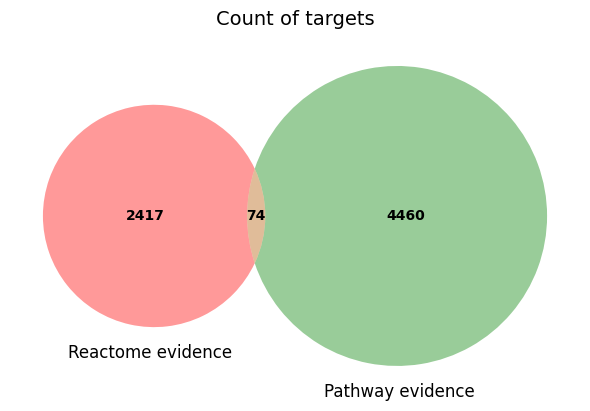

In [78]:
df = geneset_evidence_reactome
# Boolean masks
reactome_evidence = (df['datasourceId'] == 'reactome') & (df['library'].isna())
pathway_evidence = df['datasourceId'].isna() & df['library'].notna()
intersect = (df['datasourceId'] == 'reactome') & df['library'].notna()

# Counts
count_reactome = reactome_evidence.sum()
count_pathway = pathway_evidence.sum()
count_intersect = intersect.sum()


# Plot Venn diagram
plt.figure(figsize=(6, 6))
venn = venn2(subsets=(count_reactome, count_pathway, count_intersect),
             set_labels=('', ''))  # Remove default labels

# Make count labels bold
for text in venn.subset_labels:
    if text:
        text.set_fontweight('bold')

# Add custom labels below each circle (use fixed x positions)
plt.text(-0.49, -0.43, 'Reactome evidence', fontsize=12, ha='center')
plt.text(0.27, -0.55, 'Pathway evidence', fontsize=12, ha='center')

# Add title
plt.title('Count of targets', fontsize=14)
plt.tight_layout()
plt.show()